# Titanic Survival Predictions
---
##### The problem statement for this project is to find out what is the best prediction model and the best predictor to predict the survival rate of the passengers on the Titanic. 

##### One of the reasons that the shipwreck led to many loss of life was due to the lack of lifeboats for the passengers and crew. Although there were some element of luck involved in surviving, some groups of people were more likely to survive than others, such as women, children and the upper-class.

##### We applied tools of machine learning to predict which passengers survived the tragedy.

### Contents:
1. Import required libraries<br>
2. Importing data
3. Data Preparations
4. Data Visualization and Analysis

### Import required libraries

In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
sb.set() #sets the default seaborn style for graphics

### Importing Data 

In [2]:
# Load file into dataframe
titanic_train_data = pd.read_csv('titanic_train.csv')

#print the first 5 rows
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#info of data
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Check number of missing values in each column
titanic_train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### As seen above, Age, Cabin and Embarked have missing values

# Data Preparations
## Handling Missing Values

---

##### To handle the missing values above, each case needs to be handled differently

1. Age - replace missing values with mean so as to reduce effect on titanic_train_data
2. Cabin - remove entire column as majority of the values are missing
3. Embarked - replace missing values with most common value to reduce effect on titanic_train_data

In [5]:
# Remove Cabin from titanic_train_data
titanic_train_data = titanic_train_data.drop(columns='Cabin',axis = 1)

In [6]:
# First mean value of Age
print(titanic_train_data['Age'].mean())

29.69911764705882


In [7]:
# Replace missing values in Age with the mean value
titanic_train_data['Age'].fillna(titanic_train_data['Age'].mean(), inplace = True)

In [8]:
# Find mode value of Embarked
print(titanic_train_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [9]:
## Replace missing values in Age with the mean value
titanic_train_data['Embarked'].fillna(titanic_train_data['Embarked'].mode()[0], inplace = True)

In [10]:
# Check that missing values were handled correctly 
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
# Check number of missing values in each column
titanic_train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Converting Catergorical Values to Integers
----
Sex - male -> 0, female -> 1<br>

Embarked - Southhampton -> 0, Queenstown -> 1, Cherbourg ->2<br>

Separating the age into age groups:<br>
Age &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; | Group<br>
0-16 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 0<br> 
17-32 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 1<br> 
33-48 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 2<br> 
49-64 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 3<br>
more than 64&ensp;&ensp;| 4<br> 

In [12]:
# Converting categorical Columns
titanic_train_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'Q':1,'C':2}}, inplace=True)

In [13]:
# Show AgeBand when it is split evenly according to data
titanic_train_data['AgeBand'] = pd.cut(titanic_train_data['Age'], 5)
titanic_train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [14]:
# Sorts Age to a new age ranges
titanic_train_data.loc[titanic_train_data['Age'] <= 16, 'Age'] = 0
titanic_train_data.loc[(titanic_train_data['Age'] > 16) & (titanic_train_data['Age'] <= 32), 'Age'] = 1
titanic_train_data.loc[(titanic_train_data['Age'] > 32) & (titanic_train_data['Age'] <= 48), 'Age'] = 2
titanic_train_data.loc[(titanic_train_data['Age'] > 48) & (titanic_train_data['Age'] <= 64), 'Age'] = 3
titanic_train_data.loc[ titanic_train_data['Age'] > 64, 'Age'] = 4
titanic_train_data['Age'] = titanic_train_data['Age'].astype(int)

In [15]:
# Show FareBand when it is split evenly according to data
titanic_train_data['FareBand'] = pd.qcut(titanic_train_data['Fare'], 4)
titanic_train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [16]:
# Sorts Age to a new fare range
titanic_train_data.loc[titanic_train_data['Fare'] <= 7.91, 'Fare'] = 0
titanic_train_data.loc[(titanic_train_data['Fare'] > 7.91) & (titanic_train_data['Fare'] <= 14.454), 'Fare'] = 1
titanic_train_data.loc[(titanic_train_data['Fare'] > 14.454) & (titanic_train_data['Fare'] <= 31), 'Fare'] = 2
titanic_train_data.loc[titanic_train_data['Fare'] > 31 , 'Fare'] = 3
titanic_train_data['Fare'] = titanic_train_data['Fare'].astype(int)

In [17]:
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,0,"(16.336, 32.252]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,2,"(32.252, 48.168]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,0,"(16.336, 32.252]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,0,"(32.252, 48.168]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,0,"(32.252, 48.168]","(7.91, 14.454]"


## Data Cleaning (Removing uneccessary info)
---

#### Passenger ID is not required as it holds no substance.
#### Ticket values vary too much with characters and numbers that dont represent anything and can be removed.
#### Name can also be removed due to its insignificance

In [18]:
# Remove PassengerID and Ticket from dataset
titanic_train_data =titanic_train_data.drop(columns='PassengerId',axis = 1)
titanic_train_data =titanic_train_data.drop(columns='AgeBand',axis = 1)
titanic_train_data =titanic_train_data.drop(columns='FareBand',axis = 1)
titanic_train_data =titanic_train_data.drop(columns='Ticket',axis = 1)
titanic_train_data = titanic_train_data.drop(columns='Name',axis = 1)

In [19]:
titanic_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,2
2,1,3,1,1,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0


 ## Plot graphs to see their relation to 'Survived'

<Axes: xlabel='Pclass', ylabel='count'>

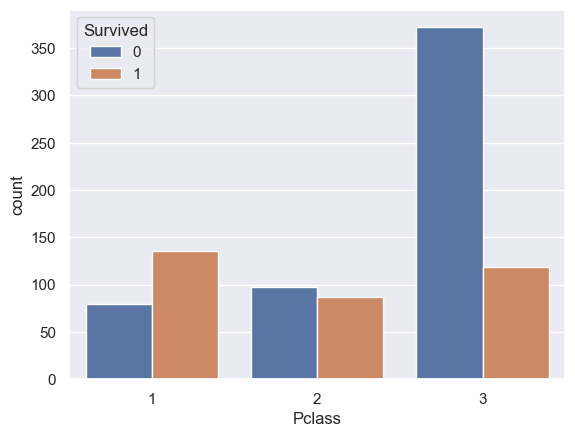

In [20]:
# Number of survivors Pclass wise
# Survived (0 = No, 1 = Yes)
# Pclass (Socio-economic status 1 = Upper, 2 = Middle, 3 = Lower)

sb.countplot(data=titanic_train_data, x= "Pclass", hue="Survived")

<Axes: xlabel='Sex', ylabel='count'>

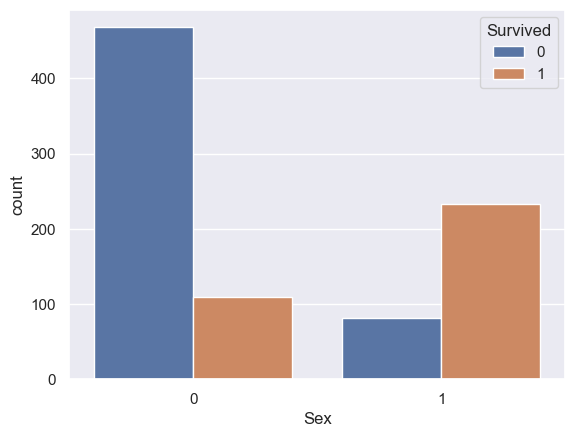

In [21]:
# Number of survivors Sex wise
# Survived (0 = No, 1 = Yes)
# Sex (0 = male, 1 = female)

sb.countplot(data=titanic_train_data, x= "Sex", hue="Survived")

<Axes: xlabel='SibSp', ylabel='count'>

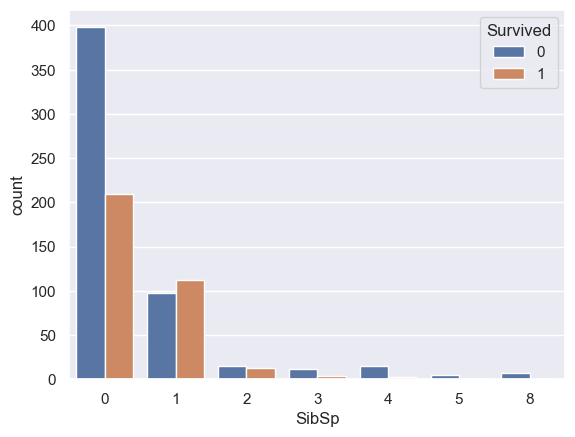

In [22]:
# Number of survivors Sibling/Spouse wise
# Survived (0 = No, 1 = Yes)
# SibSp (# of siblings / spouses aboard the Titanic)

sb.countplot(data=titanic_train_data, x= "SibSp", hue="Survived")

<Axes: xlabel='Parch', ylabel='count'>

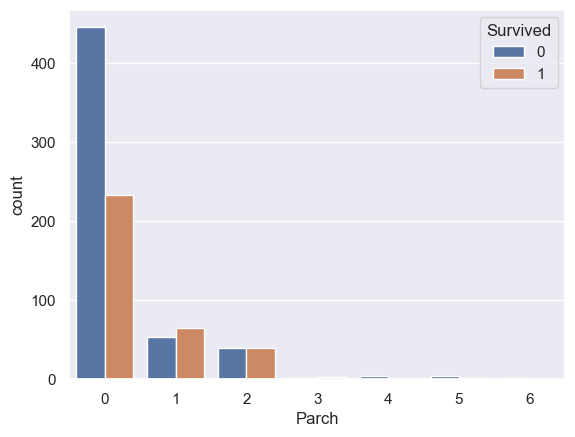

In [23]:
# Number of survivors Parent/Children wise
# Survived (0 = No, 1 = Yes)
# Parch (# of parents / children aboard the Titanic)

sb.countplot(data=titanic_train_data, x= "Parch", hue="Survived")

<Axes: xlabel='Embarked', ylabel='count'>

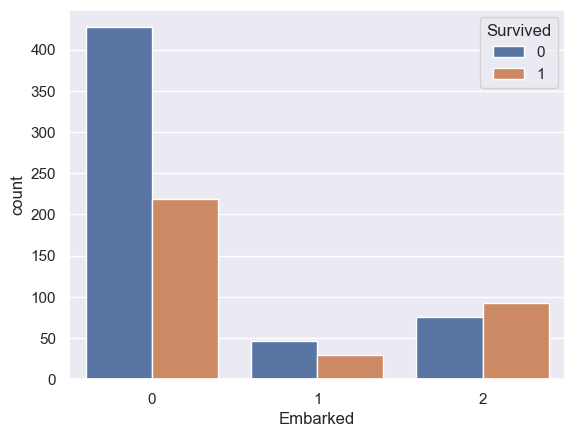

In [24]:
# Number of survivors port of Embarked wise
# Survived (0 = No, 1 = Yes)
# Embarked (Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton)

sb.countplot(data=titanic_train_data, x= "Embarked", hue="Survived")

<Axes: xlabel='Age', ylabel='count'>

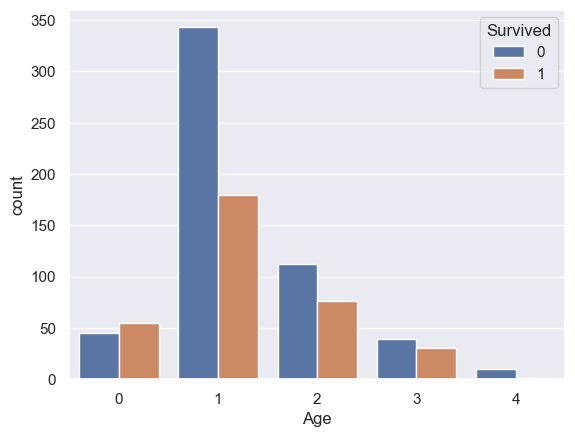

In [25]:
# Number of survivors Age group wise
# Survived (0 = No, 1 = Yes)
# Age (Age Group 0 = 0-16 ,1 = 17-32 ,2 = 33-48 ,3 = 49-64, 4 = more than 64)

sb.countplot(data=titanic_train_data, x= "Age", hue="Survived")

<Axes: xlabel='Fare', ylabel='count'>

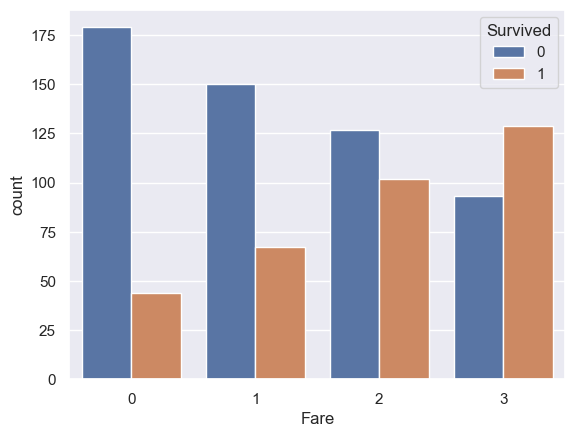

In [26]:
# Number of survivors fare group wise
# Survived (0 = No, 1 = Yes)
# Fare (Fare group 0 = $0-8,1 = $8-15,2 = $16-31,3 = more than $31)

sb.countplot(data=titanic_train_data, x= "Fare", hue="Survived")

## Conclusions from the above plots. 

#### It is evident for the variable Pclass, that those who were in the lower class had a lower chance of survival when taking into account the ratio of those that survived and those that didn't. whereas when compared to the middle and upper class, it seemed that there was roughly a 50% or higher chance for them to survive.

#### It is clearly evident from the variable Sex that males had a significantly lower chance of survival when compared to females. 

#### As for the comparisons between Siblings/Spouse and Parents/Children, it is still hard to draw any clear conclusions on the two of them, especially since the plot is clearly skewed to one side. The only possible conclusion is that those with any close relatives on the ship would have a higher chance of survival than those without. However, it is still hard due to lack of more in depth specifics such as what kind of relatives and the age of said relatives.

#### Since it is difficult for for us to measure the impacts of age and fares due to the outputs being 1 or 0, we shall simply observe its impacts through the use of a heatmap

<Axes: >

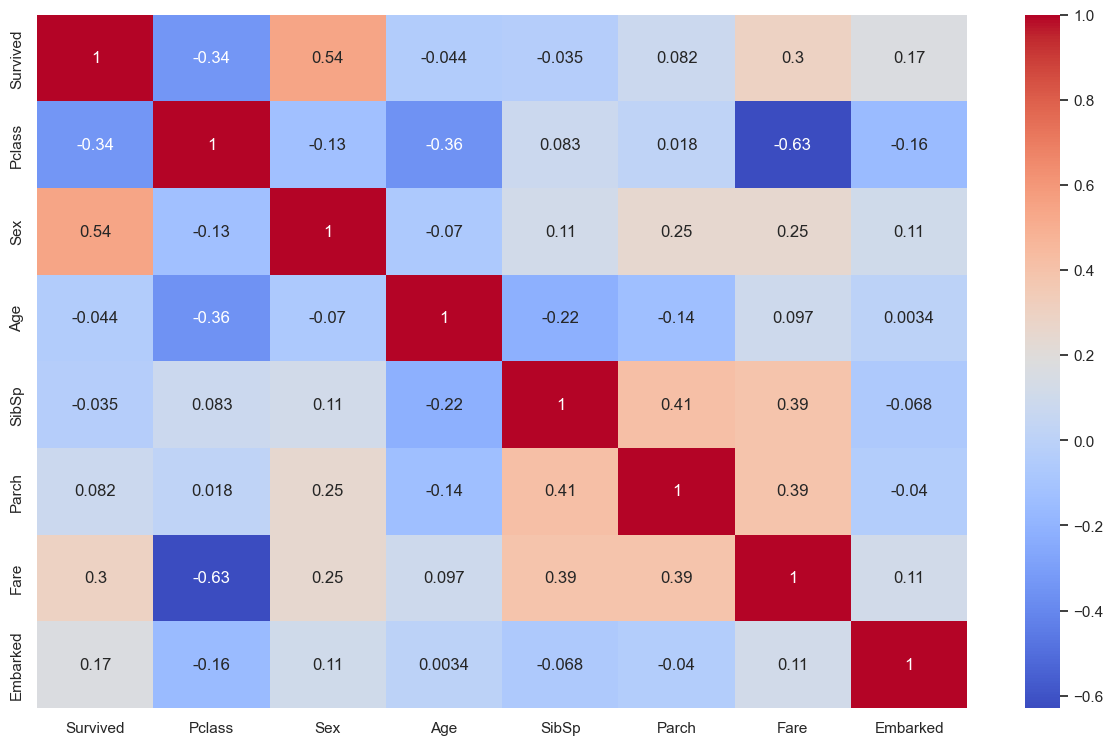

In [27]:
# Creation of Heatmap
corr = titanic_train_data.corr()
plt.figure(figsize =(15,9))
sb.heatmap(corr, annot=True, cmap='coolwarm')

#### For the purpose of the study, we simply have to look at the matrix with one of the values being 'Survived'. In addition, it is good to note that the sign of the values have the same impact.

#### Thus, from the above heatmap, we can infer that Pclass and Sex the best relations and will be the best predictors for our program. Fare price can also be a predictor for our project, but it wont be the best predictor